**Необходимые импорты**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Загрузим датасет, посмотрим на содержимое**

In [64]:
data_orig = pd.read_csv('house_prices.csv').dropna()
data_orig = data_orig.reset_index(drop=True)

print(data_orig)
print()
print(data_orig.columns)

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]

Index(['SquareFeet', 'Bedrooms', 'Bat

**Посмотрим на содержимое повнимательнее, но для начала преобразуем**

In [65]:
data = data_orig.copy()
data['Neighborhood'] = data['Neighborhood'].astype('category')
data['Neighborhood'] = data['Neighborhood'].cat.codes

print(data)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1             0       1969  215355.283618
1            2459         3          2             0       1980  195014.221626
2            1860         2          1             1       1970  306891.012076
3            2294         2          1             2       1996  206786.787153
4            2130         5          2             1       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3             0       1975  100080.865895
49996        2854         2          2             1       1988  374507.656727
49997        2979         5          3             1       1962  384110.555590
49998        2596         5          2             0       1984  380512.685957
49999        1572         5          3             0       2011  221618.583218

[50000 rows x 6 columns]


**Посмотрим на корреляцию между признаками**

In [66]:
data.iloc[:].corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


**Выведем зависимости таргет признака от остальных**

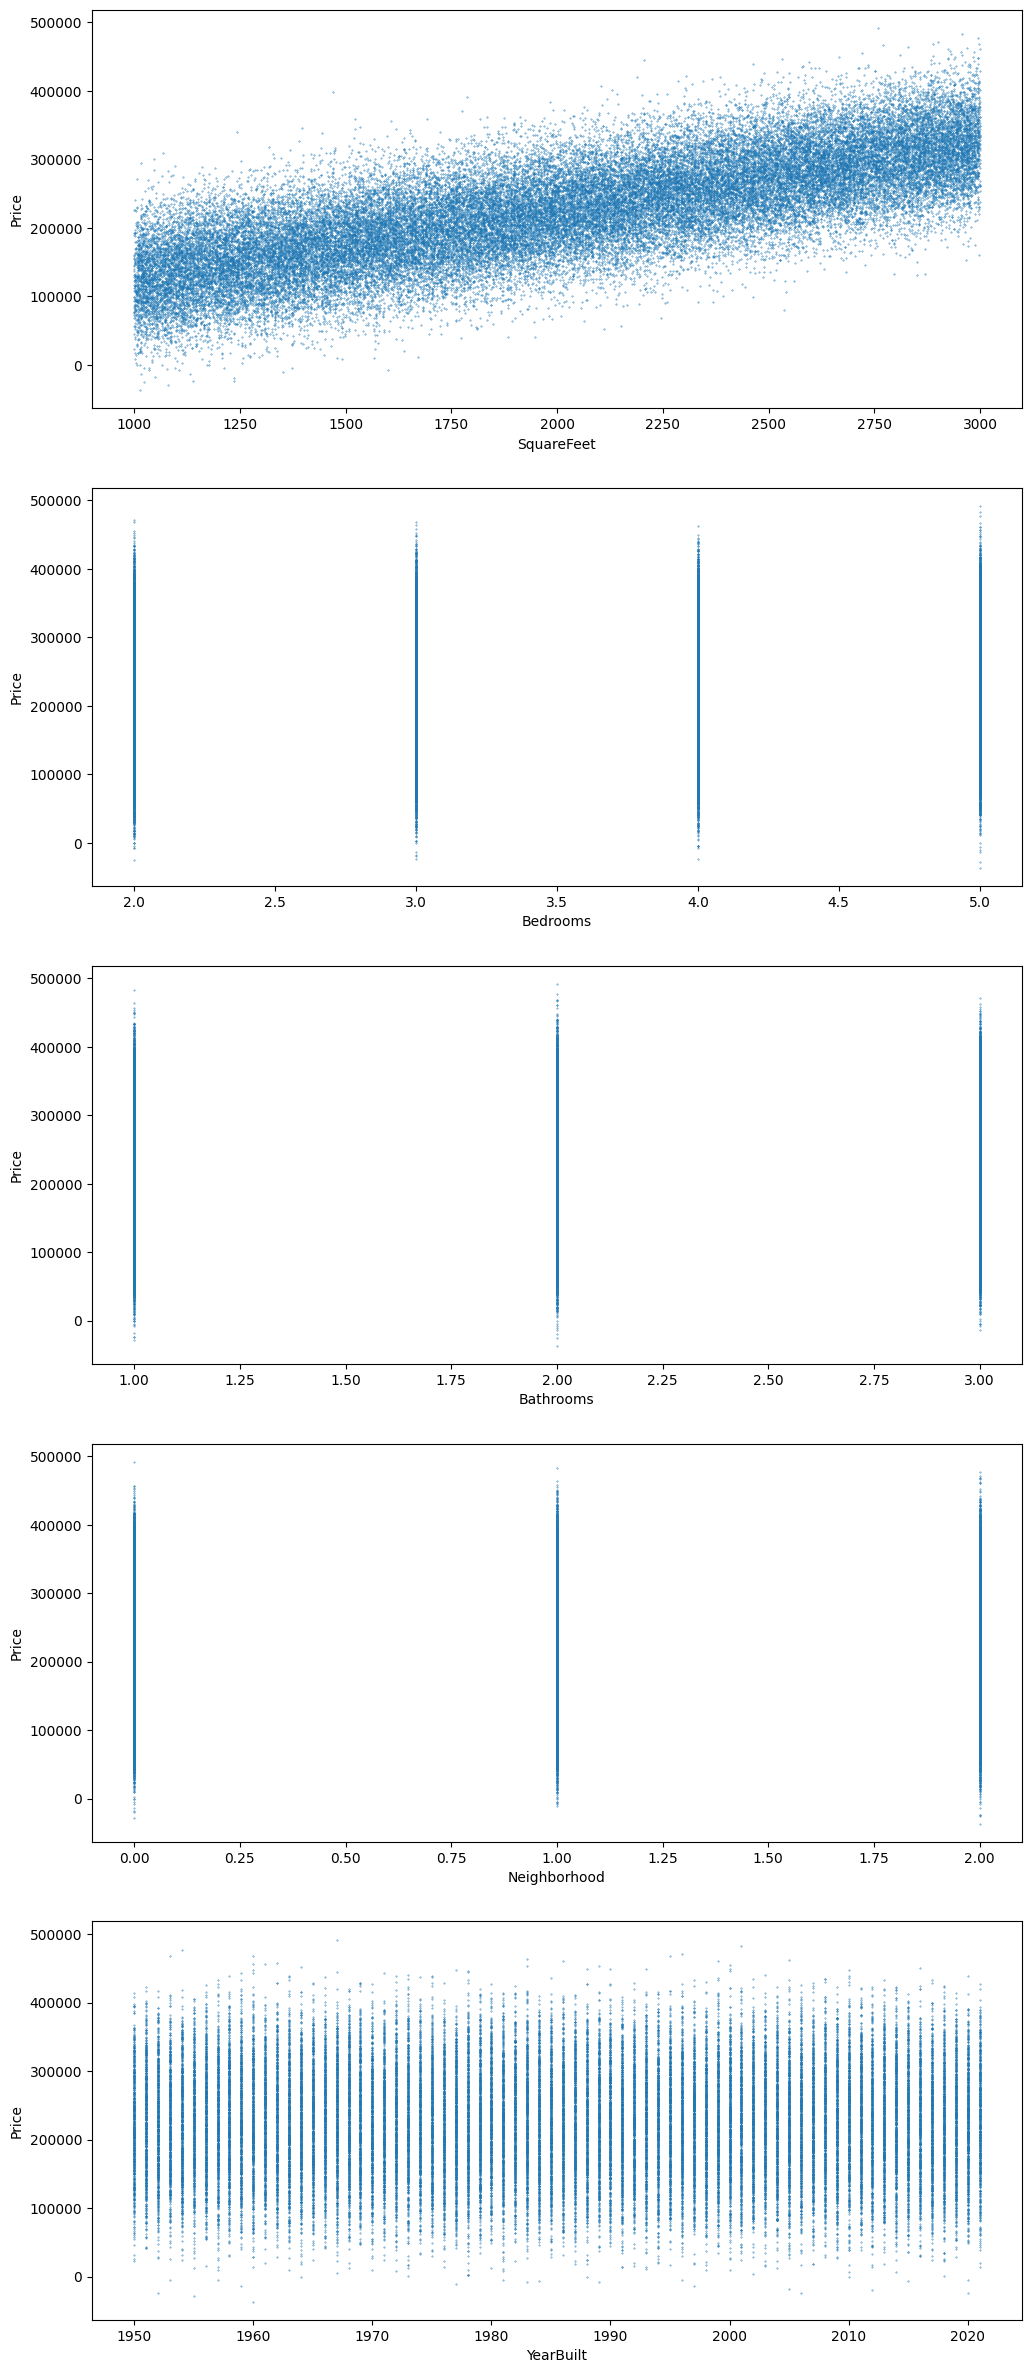

In [67]:
plt.figure(figsize=(12, 30))

plt.subplot(511)
plt.scatter(data['SquareFeet'], data['Price'], s=0.1)
plt.xlabel('SquareFeet')
plt.ylabel('Price')

plt.subplot(512)
plt.scatter(data['Bedrooms'], data['Price'], s=0.1)
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(513)
plt.scatter(data['Bathrooms'], data['Price'], s=0.1)
plt.xlabel('Bathrooms')
plt.ylabel('Price')

plt.subplot(514)
plt.scatter(data['Neighborhood'], data['Price'], s=0.1)
plt.xlabel('Neighborhood')
plt.ylabel('Price')

plt.subplot(515)
plt.scatter(data['YearBuilt'], data['Price'], s=0.1)
plt.xlabel('YearBuilt')
plt.ylabel('Price')

plt.show()

**Посмотрим на распределение численных признаков**

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

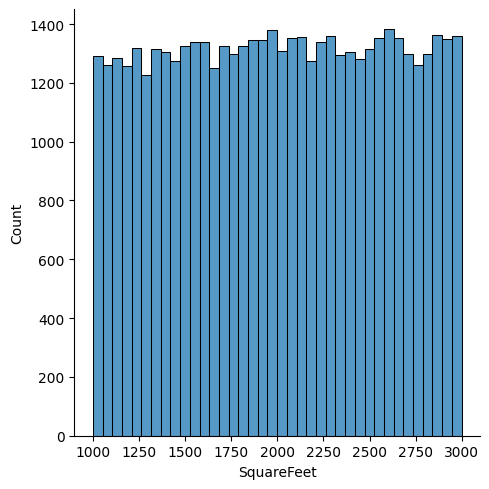

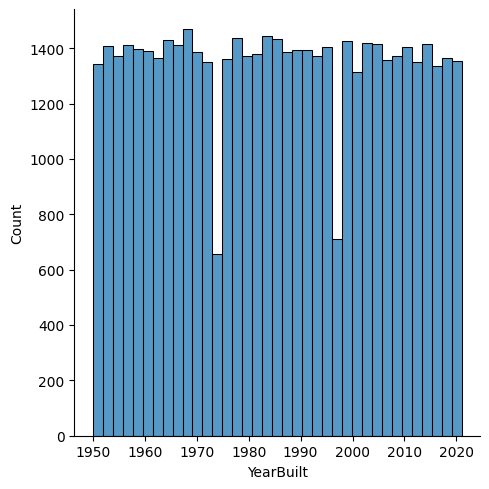

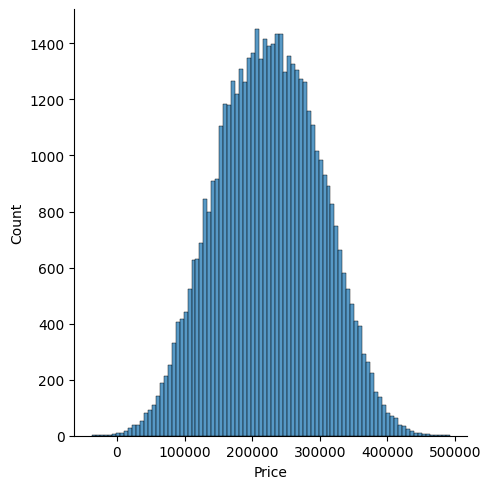

In [68]:
sns.displot(data, x='SquareFeet')
sns.displot(data, x='YearBuilt')
sns.displot(data, x='Price')

**Посмотрим распределение численных признаков по категориальным и порядковым признакам**

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

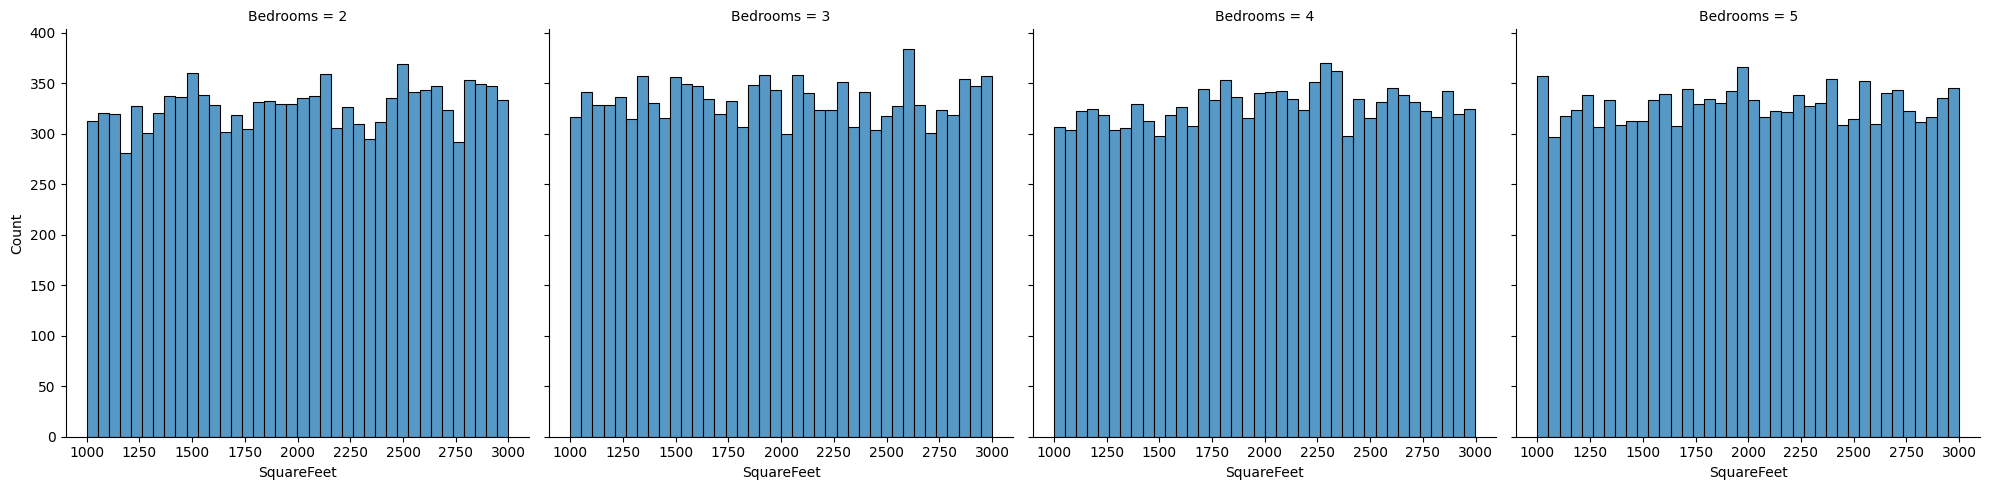

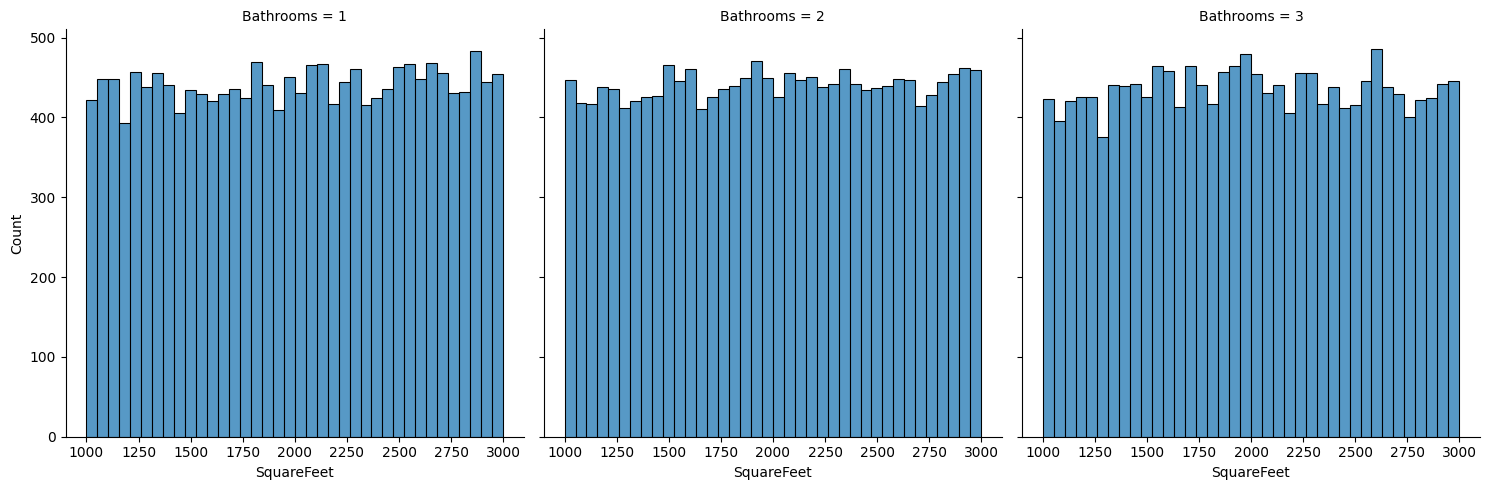

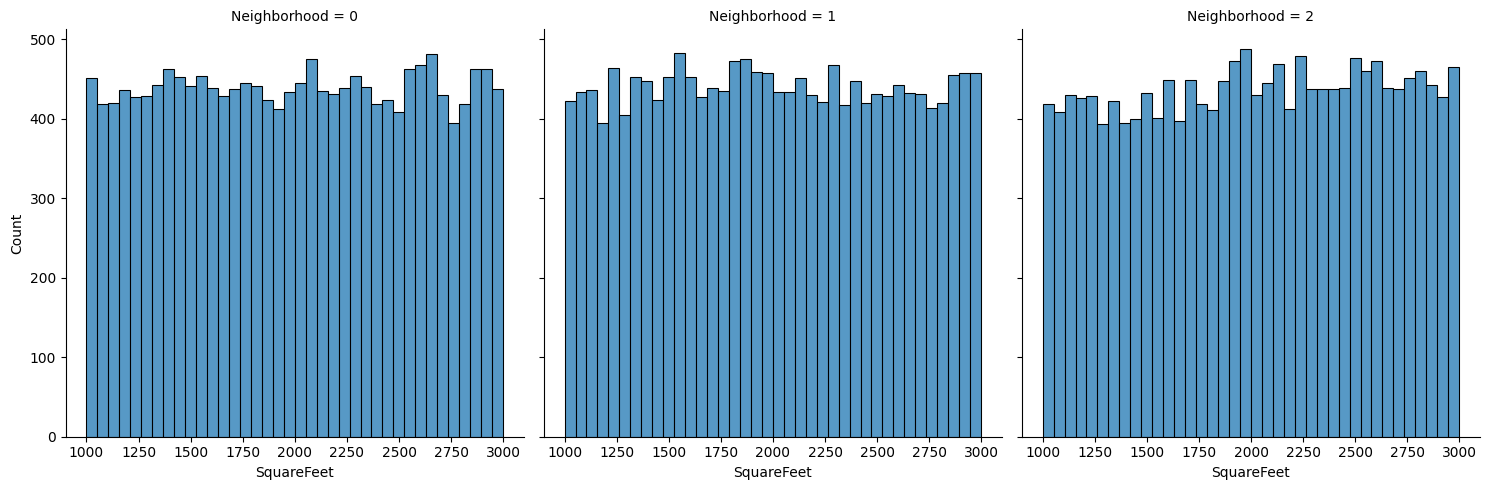

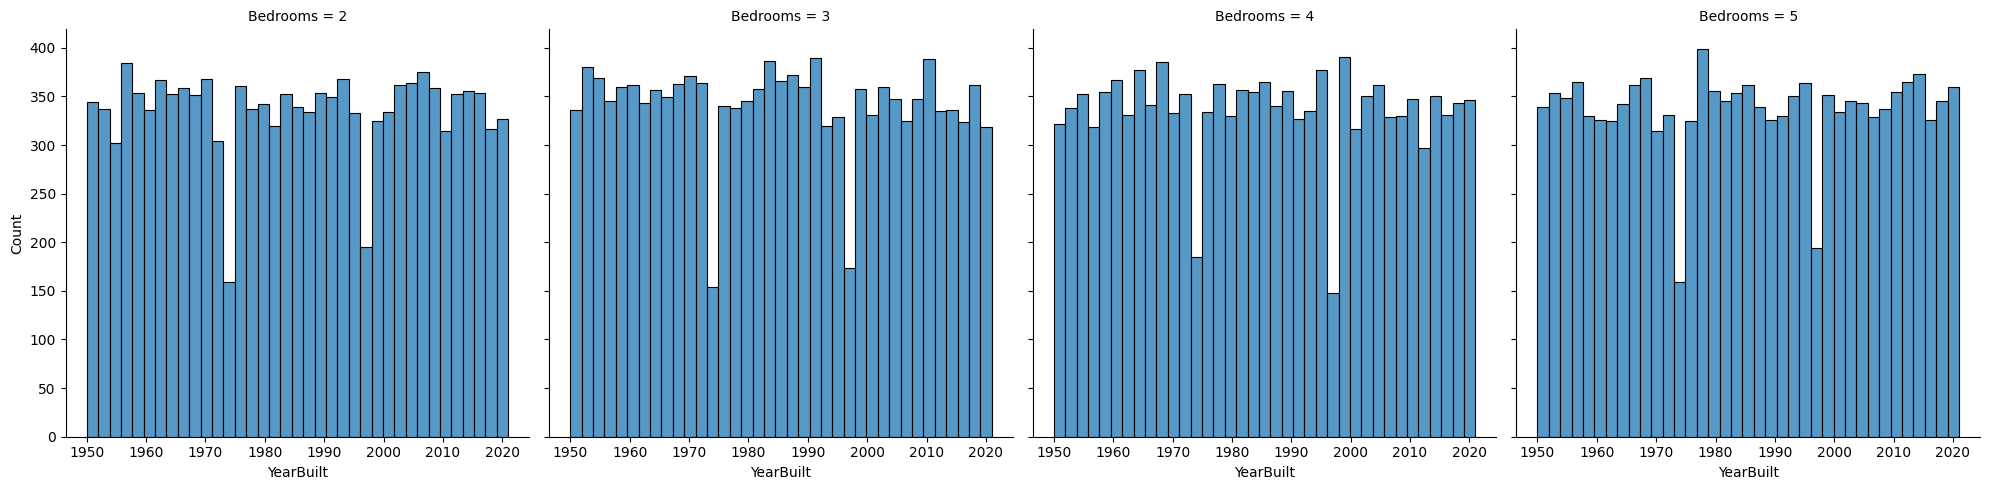

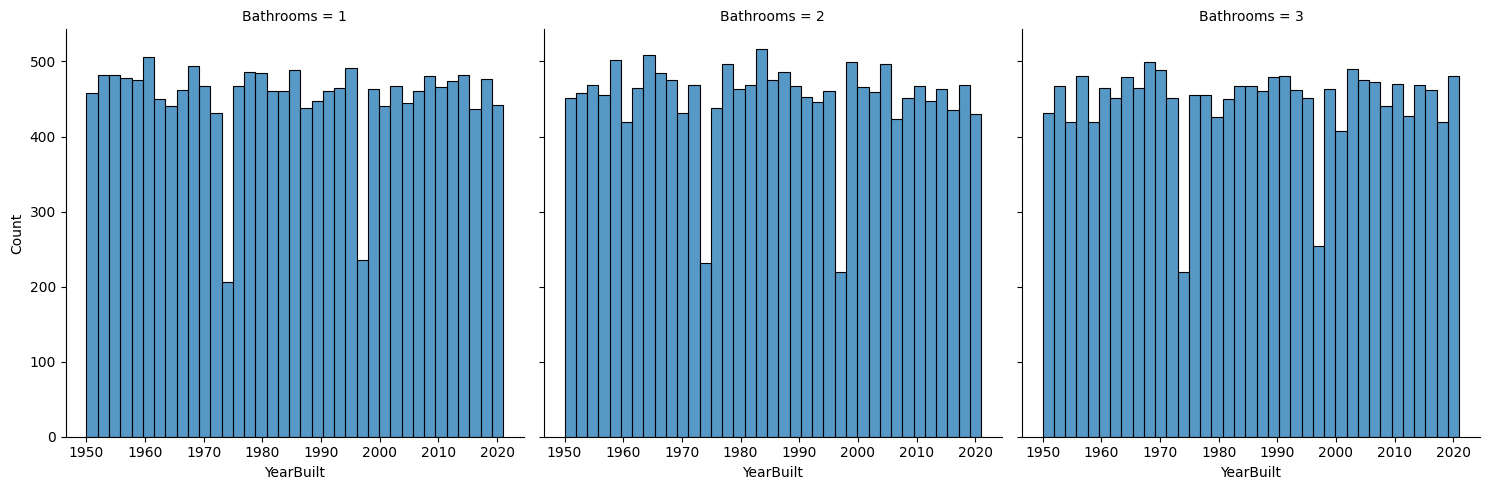

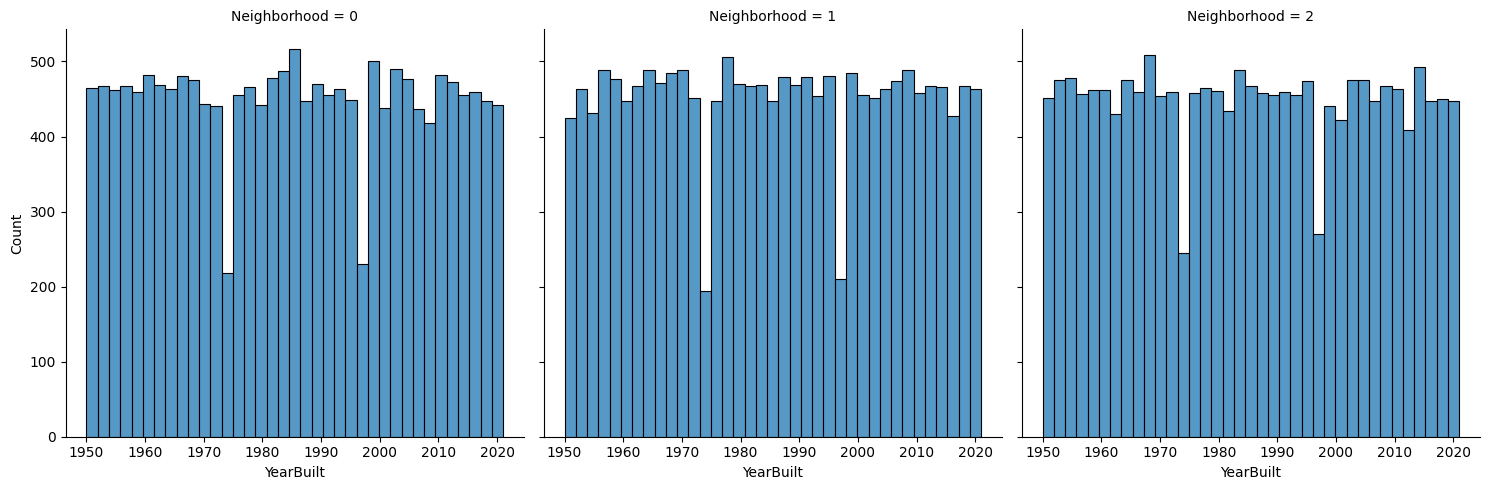

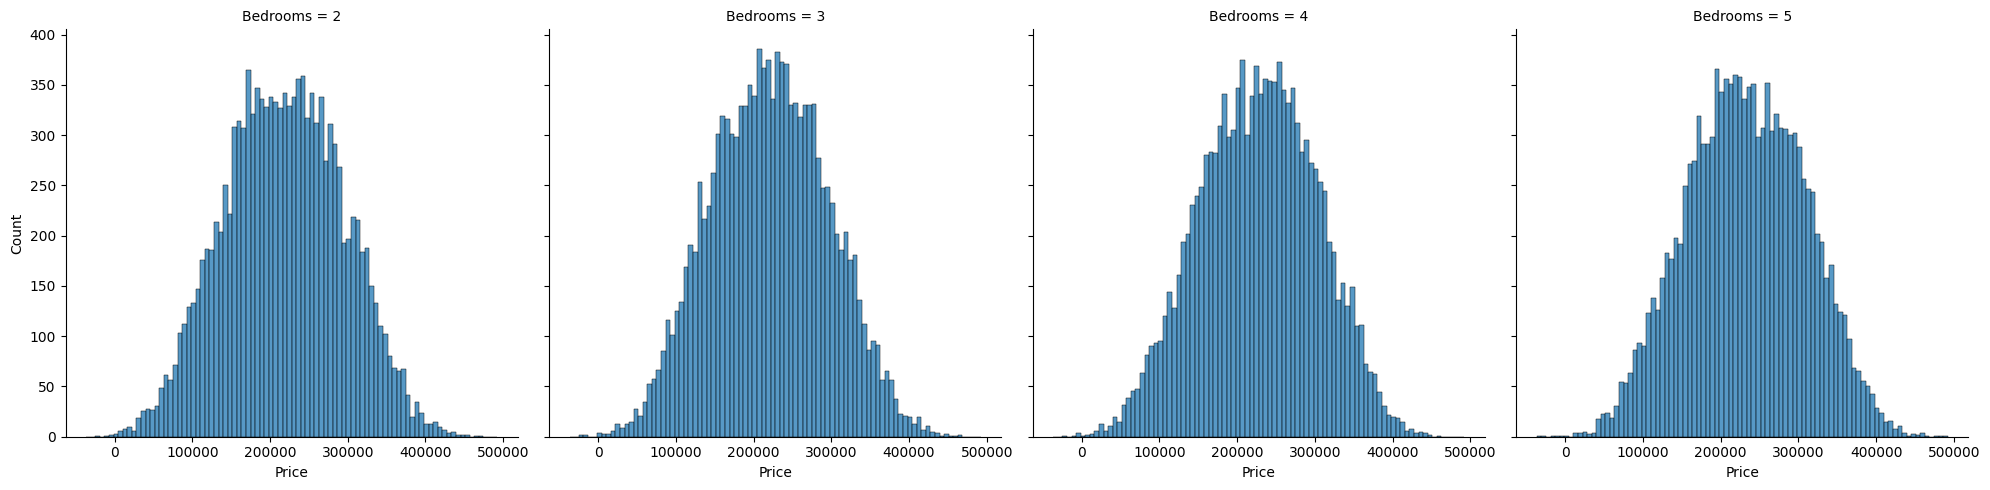

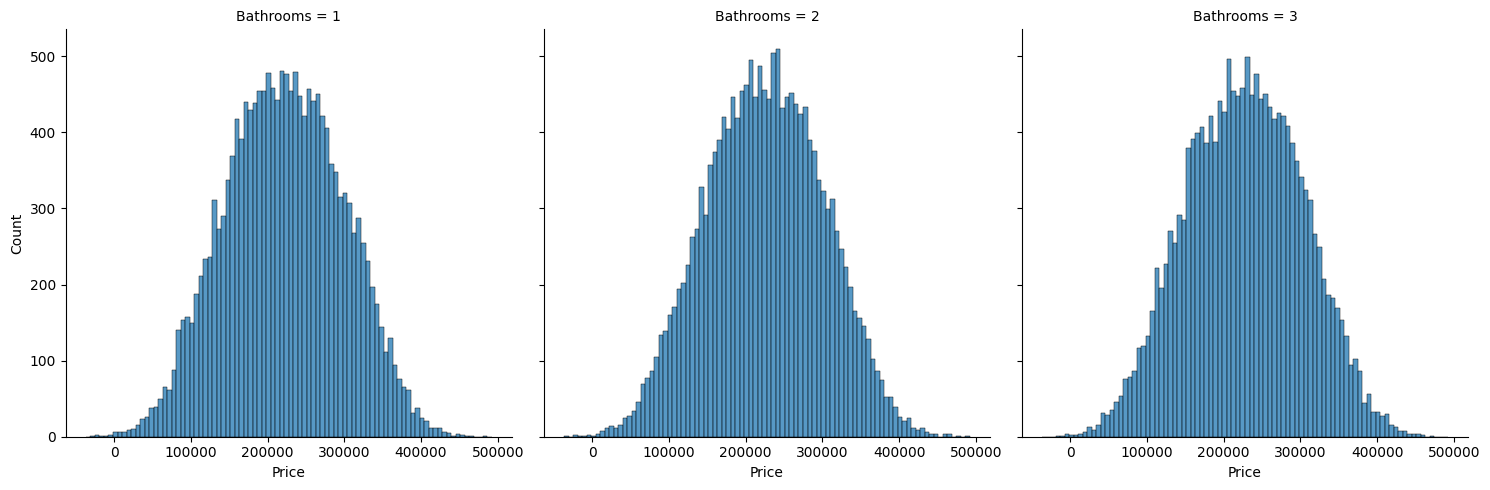

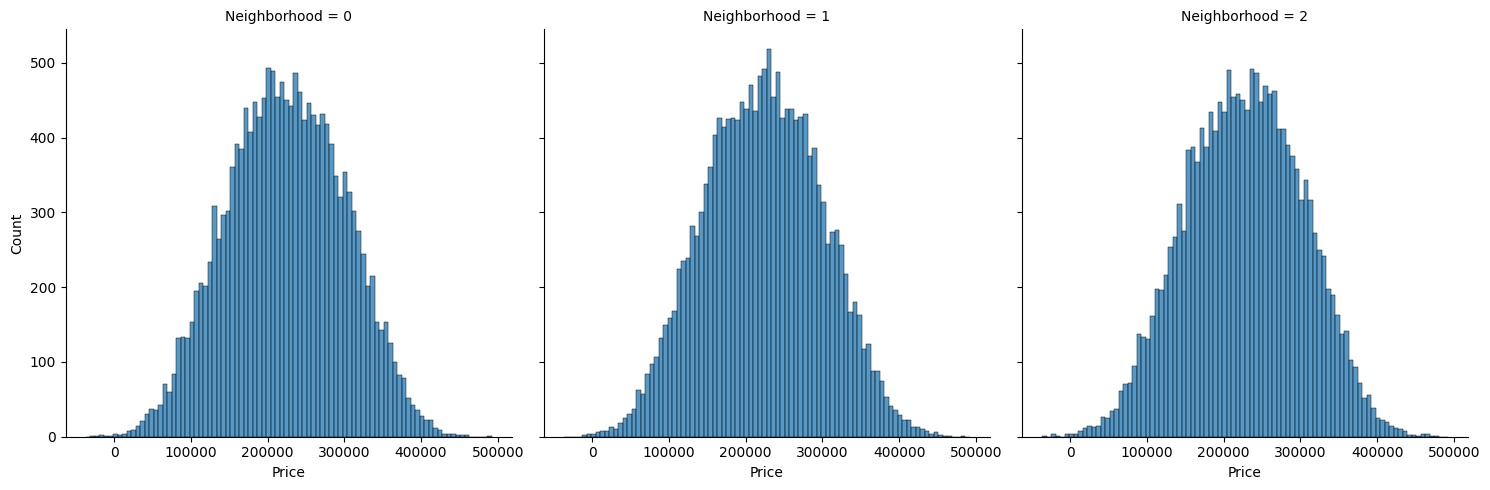

In [69]:
for numeric_feature in ['SquareFeet', 'YearBuilt', 'Price']:
    for feature in ['Bedrooms', 'Bathrooms', 'Neighborhood']:
        sns.displot(data, x=numeric_feature, col=feature)

**Разделим данные на тренировочные и тестовые**

In [70]:
x = data.drop('Price', axis=1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print(x_train)
print(y_train)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt
16880        2151         3          2             1       1985
18337        2931         5          2             2       1972
11170        2823         3          3             2       2021
17714        1598         5          2             2       1989
28539        2466         4          3             0       1966
...           ...       ...        ...           ...        ...
11863        2546         2          2             2       2004
49861        1285         4          2             1       1959
27063        1415         4          1             1       1984
8366         1070         5          2             0       1969
17530        1124         2          2             0       2019

[40000 rows x 5 columns]
16880    117583.359217
18337    351989.677954
11170    352472.765283
17714    177752.122151
28539    332638.753212
             ...      
11863    216509.485414
49861    183897.591748
27063    144188.497927

**Попробуем решить задачу с помощью линейной регрессии**

99.59027792664402
23900.4036209014


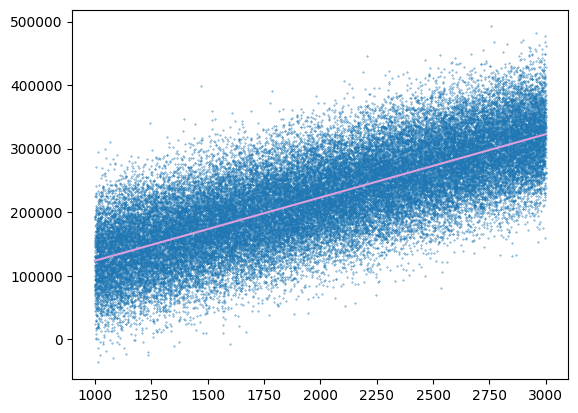

In [71]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

a = linear_reg.coef_[0]
b = linear_reg.intercept_

print(a)
print(b)

plt.scatter(data['SquareFeet'], data['Price'], s=0.1)
plt.plot([1000, 3000], [a * 1000 + b, a * 3000 + b], 'plum')

**Смотрим на MAE и MSE**

In [72]:
y_pred = linear_reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)

Mean Absolute Error:  39796.05016000407
Mean Squared Error:  49646.97602996774


**Наглядно сравним истинные и предсказанные значения**

In [73]:
comparison = zip(y_test.values, y_pred)
for gt, pred in comparison:
    print('Ground Truth:\t', gt)
    print('Predicted:\t', pred)
    print()

Ground Truth:	 284799.7493822863
Predicted:	 246061.95439541488

Ground Truth:	 80398.11485927238
Predicted:	 125550.00228277073

Ground Truth:	 263017.09012757463
Predicted:	 208030.60371991582

Ground Truth:	 310995.11306119227
Predicted:	 286184.58238346403

Ground Truth:	 241081.8475546949
Predicted:	 199474.22483974433

Ground Truth:	 99828.0749544524
Predicted:	 159648.09945641627

Ground Truth:	 106437.05821755904
Predicted:	 212551.2353257314

Ground Truth:	 112294.75980009728
Predicted:	 189613.19851179587

Ground Truth:	 252930.12848669803
Predicted:	 207404.72165780532

Ground Truth:	 192510.57536538903
Predicted:	 151803.8537491107

Ground Truth:	 165424.1711122539
Predicted:	 238633.33723340606

Ground Truth:	 346095.4803441792
Predicted:	 281191.6394204025

Ground Truth:	 326795.67717570707
Predicted:	 288667.7064540184

Ground Truth:	 236350.9212138395
Predicted:	 224735.74303369655

Ground Truth:	 247622.89982088495
Predicted:	 318456.37062668015

Ground Truth:	 346679.

**Теперь попробуем решить с помощью случайного леса**

In [74]:
rf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=4)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=4)

**Посмотрим на MAE и MSE**

In [75]:
y_pred_rf = rf.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('Mean Absolute Error: ', mae_rf)
print('Mean Squared Error: ', mse_rf)

Mean Absolute Error:  39910.3090171103
Mean Squared Error:  49771.08722366435


**И еще раз сравним истинные и предсказаные значения**

In [78]:
comparison_rf = zip(y_test.values, y_pred_rf)
for gt, pred in comparison_rf:
    print('Ground Truth:\t', gt)
    print('Predicted:\t', pred)
    print()

Ground Truth:	 284799.7493822863
Predicted:	 242308.3791872755

Ground Truth:	 80398.11485927238
Predicted:	 129784.3684467238

Ground Truth:	 263017.09012757463
Predicted:	 211373.34308355823

Ground Truth:	 310995.11306119227
Predicted:	 282857.4552074013

Ground Truth:	 241081.8475546949
Predicted:	 197764.8065356792

Ground Truth:	 99828.0749544524
Predicted:	 162768.03424341706

Ground Truth:	 106437.05821755904
Predicted:	 210952.71823512082

Ground Truth:	 112294.75980009728
Predicted:	 188761.9882376201

Ground Truth:	 252930.12848669803
Predicted:	 205613.09884960536

Ground Truth:	 192510.57536538903
Predicted:	 155547.6601647843

Ground Truth:	 165424.1711122539
Predicted:	 243295.96048856704

Ground Truth:	 346095.4803441792
Predicted:	 282659.3812605401

Ground Truth:	 326795.67717570707
Predicted:	 283070.31211311114

Ground Truth:	 236350.9212138395
Predicted:	 217407.56527353372

Ground Truth:	 247622.89982088495
Predicted:	 316889.25152158167

Ground Truth:	 346679.006